# explor adult detaset

<font size="4">
this is a full report for thr first homework for CPCS-432 (Data mining) with Dr.Nawaf Alkharboush at FCIT <br>
aiman alghamdi<br>
1535685 <br>
</font>

I have used the adult dataset to applay what we learn <br>
this is a link for the data set <br>
https://archive.ics.uci.edu/ml/datasets/Adult

## prepare  the dataset

In [77]:
#importing the Laibrarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import pairwise
from pandas.plotting import scatter_matrix




In [81]:
# read the dataset
df = pd.read_csv('adult.csv')
# add a header for the atrbute
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
#save the header
#df.to_csv("file.csv", index=False)


## Attributes

age: continuous.<br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.<br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
education-num: continuous.<br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
sex: Female, Male.<br>
capital-gain: continuous.<br>
capital-loss: continuous.<br>
hours-per-week: continuous.<br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>


## problem 1&2

<font size="4">since the first and second problem related to each other, I have made one section for both.</font>


In [4]:
print("adult dataset has {} number of features".format(len(df.columns)))
print("adult dataset has {} number of objects ".format(len(df.index)))
print(df.shape)
df.dtypes

adult dataset has 15 number of features
adult dataset has 32560 number of objects 
(32560, 15)


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

<font size="4">
adult dataset has 15 number of features<br>
adult dataset has 32560 number of objects<br>
we have two types of data here<br>
1- integer<br>
2- object (Categorical)<br>

</font>

<font size="4">

</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

<font size="4">
there is no missing data as null in this dataset <br>
according to UCI website this dataset has a missing value but not as null, we will catch it later
</font>

In [80]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_code,marital-status_code,occupation_code,relationship_code,race_code,sex_code,native-country_code,income_code
0,50,83311,13,0,0,13,6,2,4,0,4,1,39,0
1,38,215646,9,0,0,40,4,0,6,1,4,1,39,0
2,53,234721,7,0,0,40,4,2,6,0,2,1,39,0
3,28,338409,13,0,0,40,4,2,10,5,2,0,5,0
4,37,284582,14,0,0,40,4,2,4,5,4,0,39,0


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education-num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital-gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital-loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


<font size="4">
as we can see this is the statistical  for normical data<br>
what about the object data?<br>
we can do like this:
</font>

In [8]:
df["marital-status"].describe()


count                   32560
unique                      7
top        Married-civ-spouse
freq                    14976
Name: marital-status, dtype: object

In [9]:
df["marital-status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

<font size="4">
but it is not effecint<br>
better way is to encode the catagrcal data int normical data<br>
for example Y map to 0 , N map to 1 <br>

</font>

In [10]:
# make a new dataset df_new
df_new=df
# map all Categorical data to nurmical by add a new col 
#workclass         
df_new["workclass"] = df_new["workclass"].astype('category')
df_new["workclass_code"] = df_new["workclass"].cat.codes
df_new.drop('workclass', axis=1, inplace=True)

#marital-status         
df_new["marital-status"] = df_new["marital-status"].astype('category')
df_new["marital-status_code"] = df_new["marital-status"].cat.codes
df_new.drop('marital-status', axis=1, inplace=True)

#occupation         
df_new["occupation"] = df_new["occupation"].astype('category')
df_new["occupation_code"] = df_new["occupation"].cat.codes
df_new.drop('occupation', axis=1, inplace=True)

#relationship         
df_new["relationship"] = df_new["relationship"].astype('category')
df_new["relationship_code"] = df_new["relationship"].cat.codes
df_new.drop('relationship', axis=1, inplace=True)

#race         
df_new["race"] = df_new["race"].astype('category')
df_new["race_code"] = df_new["race"].cat.codes
df_new.drop('race', axis=1, inplace=True)

#sex         
df_new["sex"] = df_new["sex"].astype('category')
df_new["sex_code"] = df_new["sex"].cat.codes
df_new.drop('sex', axis=1, inplace=True)

#native-country         
df_new["native-country"] = df_new["native-country"].astype('category')
df_new["native-country_code"] = df_new["native-country"].cat.codes
df_new.drop('native-country', axis=1, inplace=True)

#income         
df_new["income"] = df_new["income"].astype('category')
df_new["income_code"] = df_new["income"].cat.codes
df_new.drop('income', axis=1, inplace=True)
df_new.drop('education', axis=1, inplace=True)

In [12]:
df_new.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education-num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
capital-gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital-loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0
workclass_code,32560.0,3.868796,1.455879,0.0,4.0,4.0,4.0,8.0
marital-status_code,32560.0,2.611794,1.506225,0.0,2.0,2.0,4.0,6.0
occupation_code,32560.0,6.572912,4.228809,0.0,3.0,7.0,10.0,14.0
relationship_code,32560.0,1.446376,1.606794,0.0,0.0,1.0,3.0,5.0


 
<font size="4">
Now we can see the statistical numbers for all Attributes
</font>

In [54]:
df_new.var()

age                    1.860671e+02
fnlwgt                 1.114075e+10
education-num          6.618831e+00
capital-gain           5.454418e+07
capital-loss           1.623817e+05
hours-per-week         1.524637e+02
workclass_code         2.119583e+00
marital-status_code    2.268714e+00
occupation_code        1.788283e+01
relationship_code      2.581786e+00
race_code              7.204897e-01
sex_code               2.213797e-01
native-country_code    6.121328e+01
income_code            1.828298e-01
dtype: float64

the variance of the data

### plotting

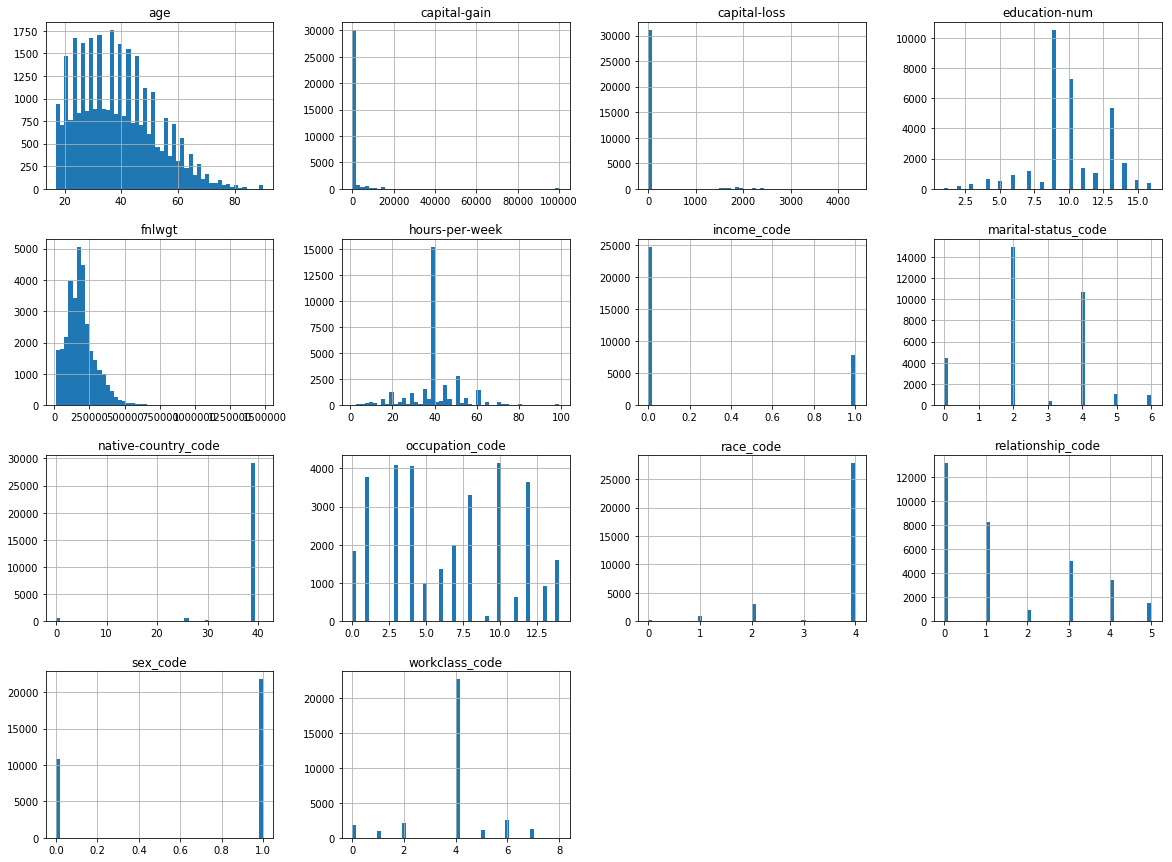

In [75]:
df_new.hist(bins=50, figsize=(20,15))
plt.show()

<font size="4">
the histogram tell as the frequency distribution of our dataset <br>
we can get a quick overview of our data 
an example of that: <br>
the histogram of hours-per-week tell as that most of the adult work for 40 hours in a week, that's been 8 hours in each day.<br>
you have to be familiar with the encoding number to more understanding of this histogram <br></font>

In [48]:
#loop if you want to display all boxplot
def DrawBoxplot ():
    for i in df_new.columns:
        Boxplot(i)
# plot boxplot
def Boxplot(name):
    boxplot = df_new.boxplot(column=[name],grid=False, fontsize=15,figsize=(6,6),sym='+')
    plt.title("boxplot of "+name)
    plt.show()

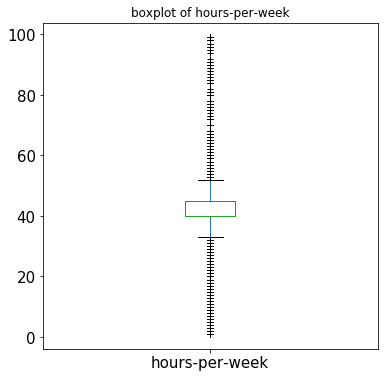

In [49]:
Boxplot("hours-per-week")

<font size="4">
from this boxplot we can say most of the adult they work from 35 to 50 hours per week, others value are outliers
<br>
what is outliers?<br>
In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses. Wikipedia
</font>


In [53]:
#df_new.plot.bar(x = 'native-country_code', y ='hours-per-week', rot = 40)
#plt.show()

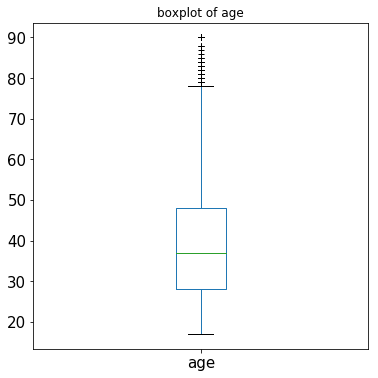

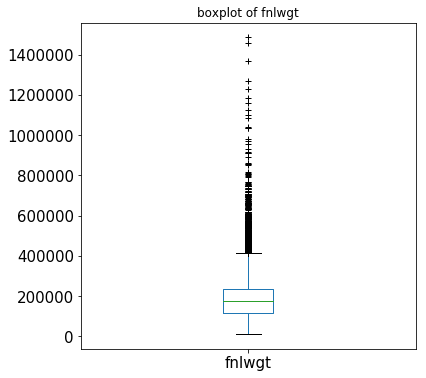

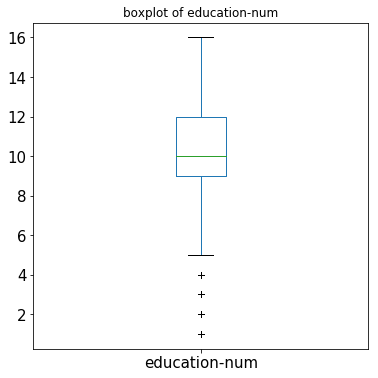

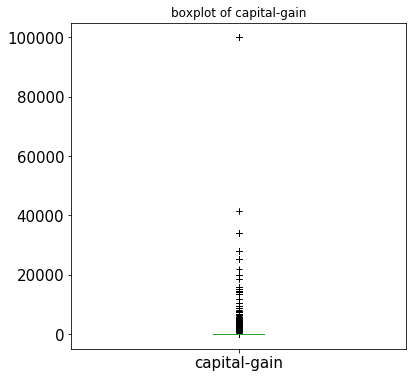

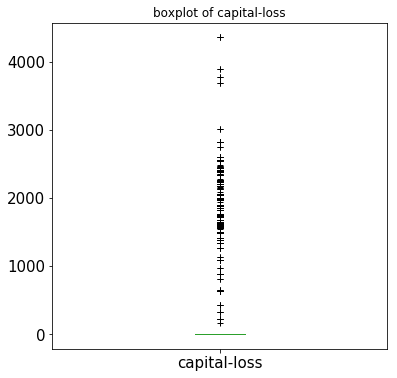

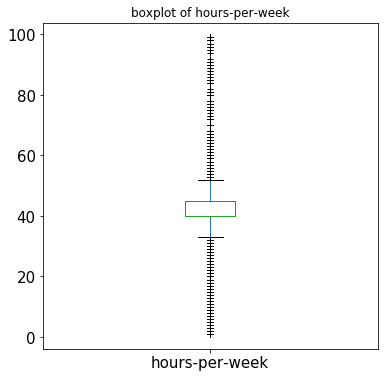

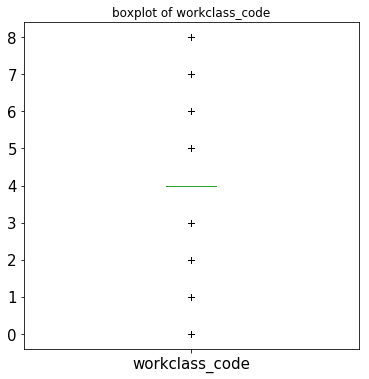

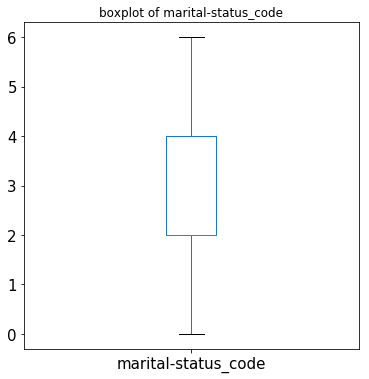

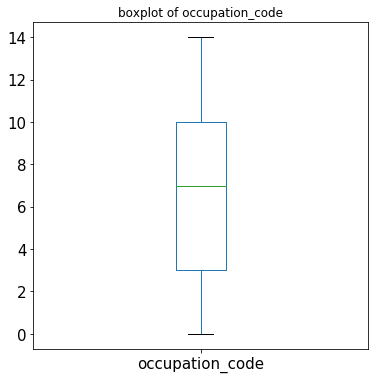

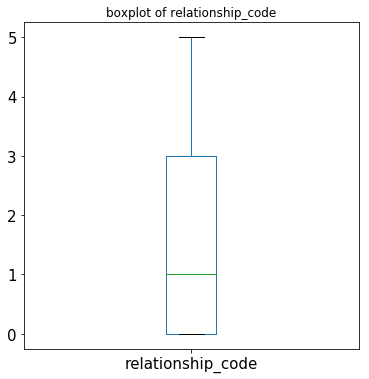

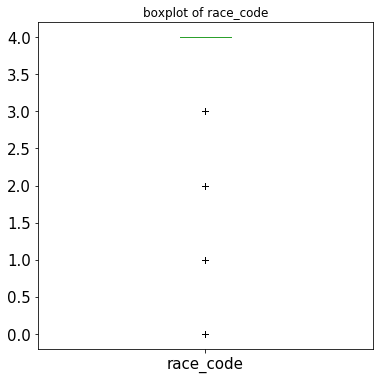

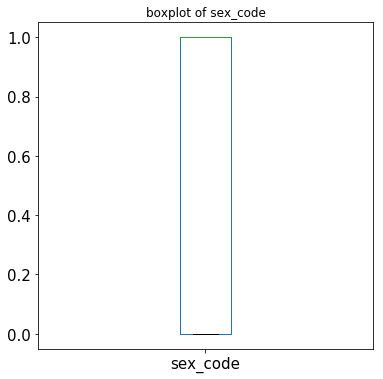

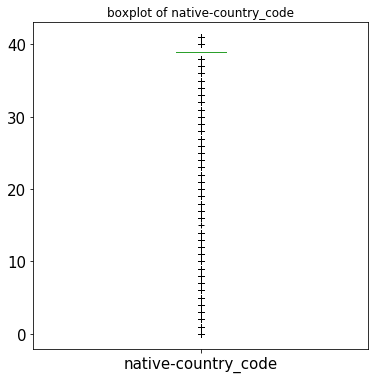

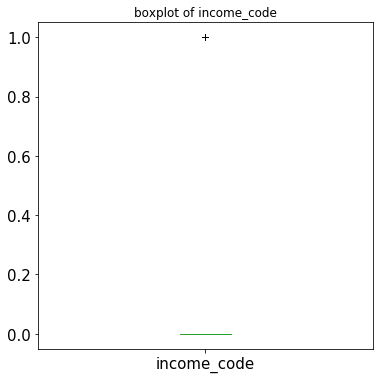

In [104]:
DrawBoxplot()

In [76]:
#df_new.plot(kind='box', subplots=True, layout=(14,14), sharex=False, sharey=False,stacked=True)
#plt.show()

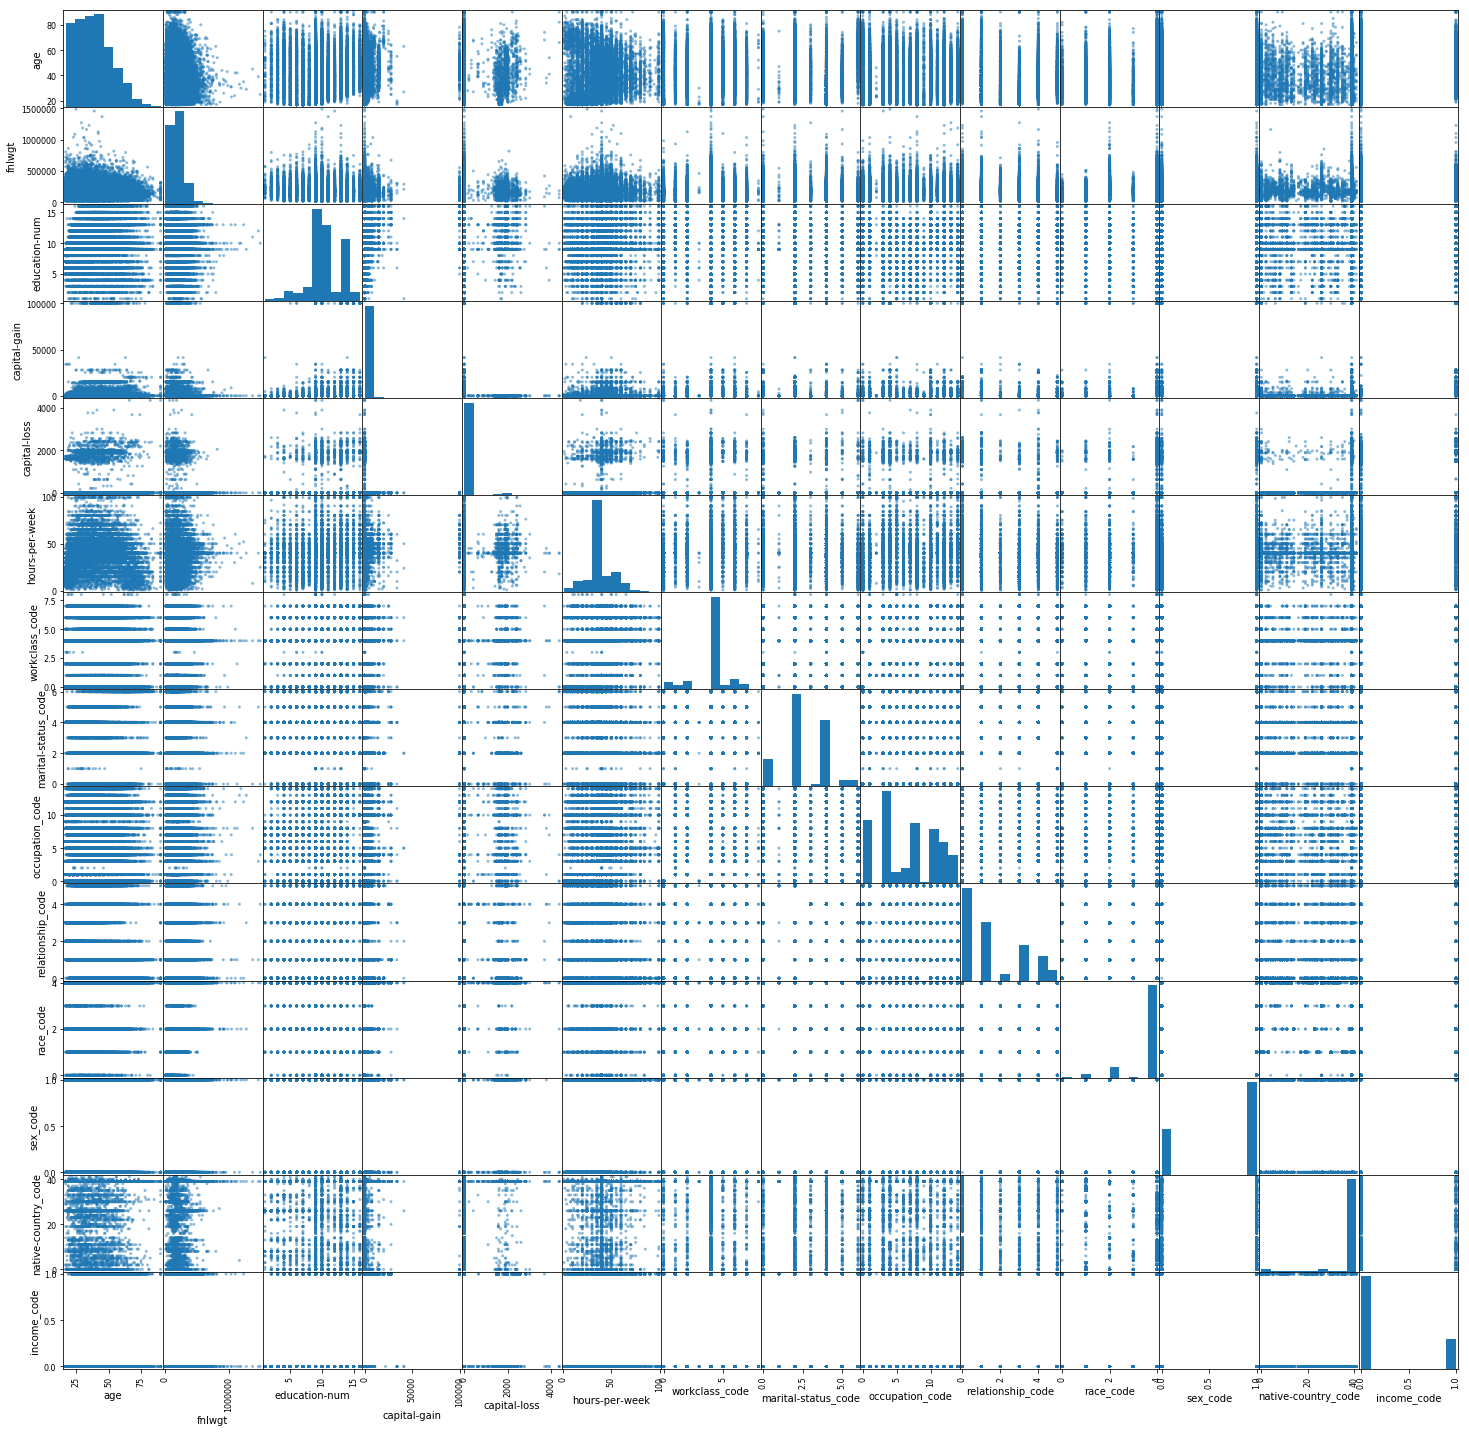

In [125]:
scatter_matrix(df_new,figsize=(25, 25))
plt.show()

<font size="4">
scatter plot is useful to find the correlation between the vraabial<br>
in this scatter we don't have a clear correlation because the data it's not preprocessing yet, and some important data such as income has a boolean value, so we cannot determine the correlation now</font>

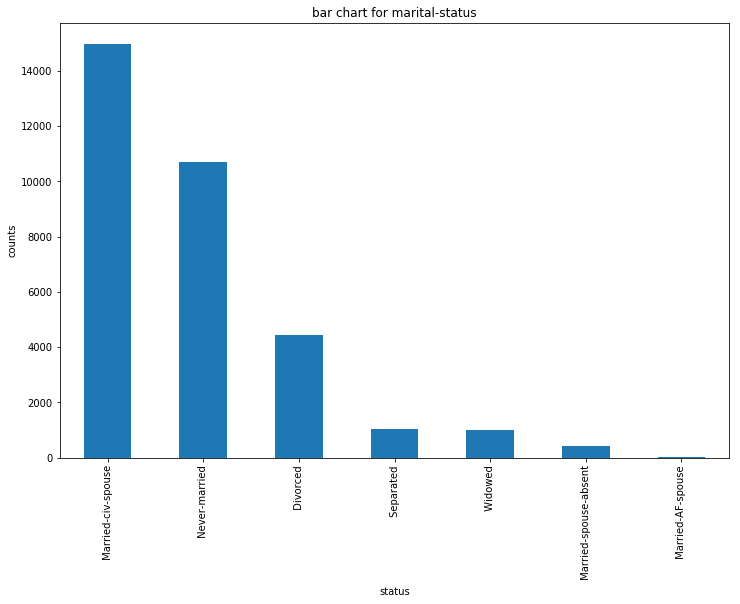

In [82]:
df['marital-status'].value_counts().plot(kind='bar',figsize=(12, 8))
plt.title("bar chart for marital-status")
plt.ylabel("counts")
plt.xlabel("status")
plt.show()

here we can see a simple bar chart for marital-status

## problem 3

<font size="4">

in this problem, we have to find the distance or the similarity of our data frame
using <br>
i. Ctiblock distance (Manhattan),<br>
ii. Euclidean distance,<br>
iii. Minkowski distance when p = 3,<br>
iv. Cosine distance
</font>

In [85]:
#first we have to select the rows
## more than 1
x=df_new.loc[1000:1003]
y=df_new.loc[1003:1006]
## one row
x1=df_new.loc[458]
y1=df_new.loc[668]


### i. Ctiblock distance (Manhattan)

In [96]:
print("the distance between x1 and y1 is ")
distance.cityblock(x1,y1)


the distance between x1 and y1 is 


58149

this method take only one row

### ii.Euclidean distance

In [97]:
#for many rows
pairwise.euclidean_distances(x,y)

array([[  5952.31324781, 187864.63054285, 103372.50399889,
         12734.86945359],
       [181070.00178936,  12425.02144867,  72075.0057787 ,
        162838.00020573],
       [ 47328.02139325, 240823.00357939, 156323.00731818,
         65560.00558267],
       [     0.        , 193495.00357374, 108995.00830772,
         18232.0184017 ]])

we see that we have 0 becouse there is no distance ( same row)

In [98]:
print("the distance between x1 and y1 is ")
#for one row
distance.euclidean(x1,y1)

the distance between x1 and y1 is 


56427.25229000611

In [99]:
print("the distance between x1 and y1 is ")

distance.euclidean(x1,x1)

the distance between x1 and y1 is 


0.0

same row has 0 distance

### iii. Minkowski distance when p = 3,

In [101]:
print("the distance between x1 and y1 is ")

distance.minkowski(x1,y1,p=3)

56401.53412600721

### iv. Cosine distance

In [102]:
# many rows
pairwise.cosine_similarity(x,y)

array([[0.99993603, 0.99993602, 0.99993604, 0.99993606],
       [0.99999999, 1.        , 0.99999999, 0.99999998],
       [0.9999999 , 0.99999988, 0.9999999 , 0.99999994],
       [1.        , 0.99999999, 0.99999999, 0.99999999]])

1 means has highly similarity

In [104]:
pairwise.cosine_distances(x,y)

array([[6.39680758e-05, 6.39773687e-05, 6.39564468e-05, 6.39386153e-05],
       [1.22868041e-08, 1.93902672e-09, 9.90689031e-09, 1.67665576e-08],
       [9.65572964e-08, 1.17714895e-07, 9.54098491e-08, 5.73362614e-08],
       [0.00000000e+00, 1.07695524e-08, 8.04987044e-09, 8.81502737e-09]])

0 becouse it's same row.

In [105]:
print("the distance between x1 and y1 is ")

distance.cosine(x1,y1)

4.9994268245923124e-05

In [106]:
print("the similarity between x1 and y1 is ")

1-distance.cosine(x1,y1)

the similarity between x1 and y1 is 


0.9999500057317541

# references

https://medium.com/@rahulkuntala9/cosine-similarity-and-handling-categorical-variables-29f907951b5 <br>
https://realpython.com/python-histograms/ <br>
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51 <br>